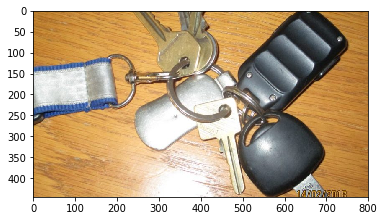

In [175]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('keys.jpg')
img = cv.cvtColor(img, cv.COLOR_RGB2BGR)
plt.imshow(img)

('Otsu Treshold', 9L)


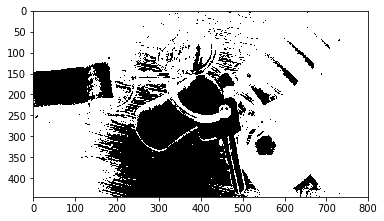

In [176]:
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
otsu = cv.THRESH_BINARY_INV+cv.THRESH_OTSU 
print("Otsu Treshold", otsu)
ret, thresh = cv.threshold(gray,0,255,otsu)
plt.imshow(thresh, cmap = plt.get_cmap('gray'))
plt.show()

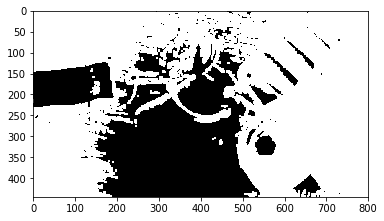

In [177]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv.morphologyEx(thresh,cv.MORPH_OPEN,kernel, iterations = 2)
plt.imshow(opening, cmap = plt.get_cmap('gray'))
plt.show()

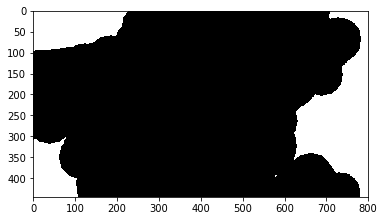

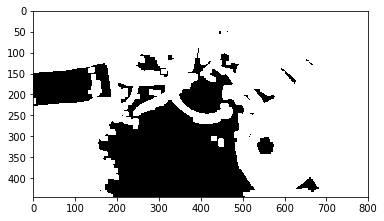

In [178]:
# sure background area
sure_bg = cv.dilate(opening,kernel,iterations=3)
# Finding sure foreground area
dist_transform = cv.distanceTransform(opening,cv.DIST_L2,5)
ret, sure_fg = cv.threshold(dist_transform,0.3*dist_transform.max(),255,0)
plt.imshow(sure_fg, cmap = plt.get_cmap('gray'))
plt.show()
plt.imshow(sure_bg, cmap = plt.get_cmap('gray'))
plt.show()

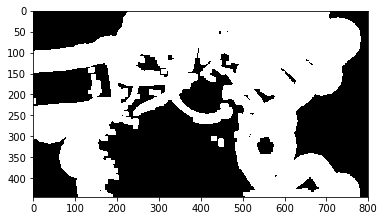

In [179]:
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_bg,sure_fg)
plt.imshow(unknown, cmap = plt.get_cmap('gray'))
plt.show()

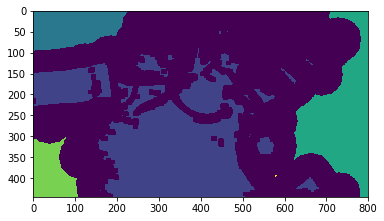

In [180]:
# Marker labelling
ret, markers = cv.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0
plt.imshow(markers)
plt.show()

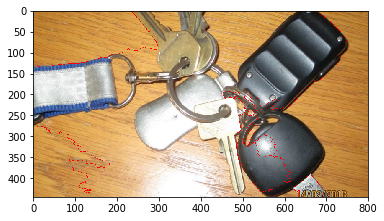

In [181]:
markers = cv.watershed(img,markers)
img[markers == -1] = [255,0,0]
plt.imshow(img)
plt.show()

In [182]:
import sys
import numpy
numpy.set_printoptions(threshold=5)
markers[markers != -1] = 0
markers

array([[-1, -1, -1, ..., -1, -1, -1],
       [-1,  0,  0, ...,  0,  0, -1],
       [-1,  0,  0, ...,  0,  0, -1],
       ...,
       [-1,  0,  0, ...,  0,  0, -1],
       [-1,  0,  0, ...,  0,  0, -1],
       [-1, -1, -1, ..., -1, -1, -1]], dtype=int32)

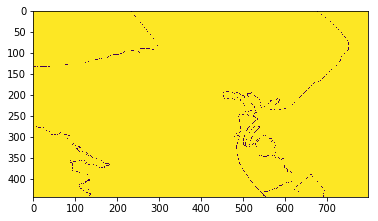

In [183]:
plt.imshow(markers[1:-1,1:-1])

In [190]:
numpy.set_printoptions(threshold=5)
print(markers[1:,1:].shape)
coord = np.where(markers[1:-1,1:-1] == -1)
coord

(444, 799)


(array([  0,   0,   1, ..., 442, 442, 442]),
 array([234, 676, 234, ..., 555, 635, 692]))

In [185]:
print("Min [X,Y]",numpy.amin(coord, 1),
"Max [X,Y]", numpy.amax(coord, 1))

xval = coord[0][numpy.argmin(coord,1)]
yval = coord[1][numpy.argmin(coord,1)]
yval2 = coord[0][numpy.argmax(coord, 1)]
xval2= coord[1][numpy.argmax(coord, 1)]
print(xval, yval, yval2, xval2)

('Min [X,Y]', array([0, 0]), 'Max [X,Y]', array([442, 752]))
(array([  0, 134]), array([234,   0]), array([442,  82]), array([134, 752]))


In [186]:
x=xval.tolist()+xval2.tolist()
y=yval.tolist()+yval2.tolist()
print(x,y)
coord= zip(x,y)
print(coord)

([0, 134, 134, 752], [234, 0, 442, 82])
[(0, 234), (134, 0), (134, 442), (752, 82)]


In [187]:
#cod=[21, 59,259, 220]
b = np.zeros((300,300))
for c in coord:
    b[c[0],c[1]]=128
plt.imshow(b)

IndexError: index 442 is out of bounds for axis 1 with size 300

In [188]:
from __future__ import division 

def line(p1, p2):
    A = (p1[1] - p2[1])
    B = (p2[0] - p1[0])
    C = (p1[0]*p2[1] - p2[0]*p1[1])
    return A, B, -C

def intersection(L1, L2):
    D  = L1[0] * L2[1] - L1[1] * L2[0]
    Dx = L1[2] * L2[1] - L1[1] * L2[2]
    Dy = L1[0] * L2[2] - L1[2] * L2[0]
    if D != 0:
        x = Dx // D
        y = Dy // D
        return x,y
    else:
        return False

L1 = line(coord[3], coord[0])
L2 = line(coord[2], coord[1])

R = intersection(L1, L2)

print(L1, L2, R)


((-152, -752, -175968), (442, 0, 59228), (134, 206))


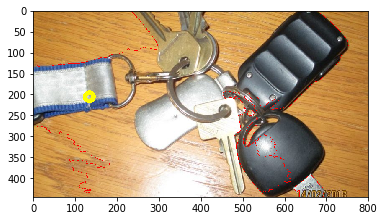

In [189]:
cv.circle(img, R, 10, (255,255,0), 10)
plt.imshow(img)